In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

# NLP
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

# ML tools
from sklearn.model_selection import (
    TimeSeriesSplit, GridSearchCV, train_test_split, cross_val_score
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import (
    classification_report, accuracy_score, confusion_matrix,
    precision_score, recall_score, f1_score, balanced_accuracy_score
)

# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import StratifiedKFold


# XGBoost
from xgboost import XGBClassifier

# Oversampling
from imblearn.over_sampling import SMOTE

# PyTorch
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

# TensorFlow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv1D, MaxPooling1D, Input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from collections import defaultdict
# Reproducibility
RND = 42
np.random.seed(RND)

# NLTK downloads
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving df_subjobj_full.csv to df_subjobj_full.csv


In [ ]:
# load news and stock dataset
df=pd.read_csv("Combined_News_DJIA.csv")
dj=pd.read_csv("upload_DJIA_table.csv")

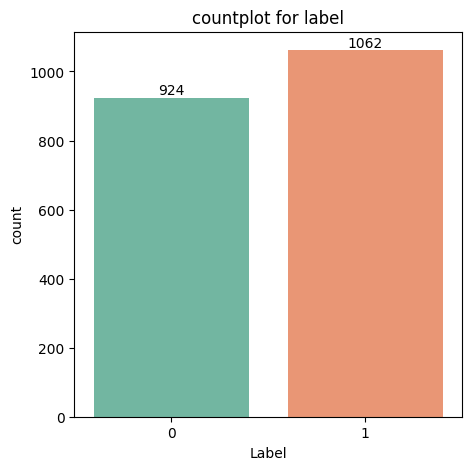

In [ ]:
#plot for lable
plt.figure(figsize=(5,5))
sns.countplot(data=df,x="Label",palette="Set2")
plt.title("countplot for label")

# Adding data labels on top of the bars
for bar in plt.gca().patches:
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    plt.text(x, height, str(int(height)), ha='center', va='bottom')

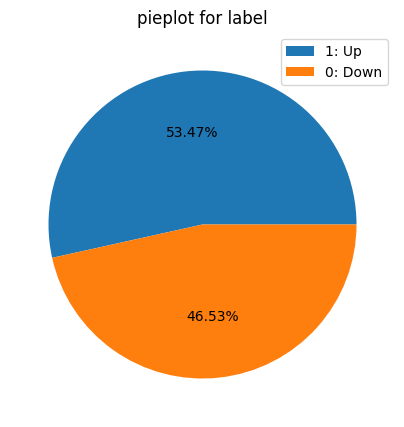

In [ ]:
plt.figure(figsize=(5,5))
labels=["1: Up","0: Down"]
plt.pie(x=df["Label"].value_counts(),autopct="%0.2f%%")
plt.title("pieplot for label")
plt.legend(labels)

In [ ]:


df_news = pd.read_csv("Combined_News_DJIA.csv")
df_stock = pd.read_csv("upload_DJIA_table.csv")

df_news["Date"] = pd.to_datetime(df_news["Date"])
df_stock["Date"] = pd.to_datetime(df_stock["Date"])

# Inner join: keep dates where we have both news and stock
df = pd.merge(df_news, df_stock, on="Date", how="inner")

print("After merge news+stock:", df.shape)
print(df[["Date", "Open", "Adj Close"]].head())
df.head()


After merge news+stock: (1989, 33)
        Date          Open     Adj Close
0 2008-08-08  11432.089844  11734.320312
1 2008-08-11  11729.669922  11782.349609
2 2008-08-12  11781.700195  11642.469727
3 2008-08-13  11632.809570  11532.959961
4 2008-08-14  11532.070312  11615.929688


,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top22,Top23,Top24,Top25,Open,High,Low,Close,Volume,Adj Close
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",...,b'Taliban wages war on humanitarian aid workers',"b'Russia: World ""can forget about"" Georgia\'s...",b'Darfur rebels accuse Sudan of mounting major...,b'Philippines : Peace Advocate say Muslims nee...,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688


In [ ]:

# =============================
# 2. CLEAN TEXT + VADER SENTIMENT (COMBINED NEWS)
# =============================
headline_cols = [f"Top{i}" for i in range(1, 26)]

stop = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r"b[\"']", " ", str(text).lower())
    text = re.sub(r"\[.*?\]\(.*?\)", "", text)
    text = re.sub(r"[^\w\s]", " ", text)
    text = re.sub(r"\s+", " ", text)
    tokens = word_tokenize(text)
    output = [lemmatizer.lemmatize(w) for w in tokens if w.isalpha() and w not in stop]
    return " ".join(output)

# Combine all 25 headlines into one text per day
df["combined_news"] = df.loc[:, "Top1":"Top25"].astype(str).agg(" ".join, axis=1)
df["clean_text"] = df["combined_news"].apply(clean_text)

In [ ]:
# VADER on combined cleaned text
from nltk.sentiment import SentimentIntensityAnalyzer   # <<< ADD
sid = SentimentIntensityAnalyzer()                      # <<< ADD

def get_sentiment(text):
    return sid.polarity_scores(str(text))

compound = []
neg = []
pos = []
neu = []

for i in range(len(df)):
    scores = get_sentiment(df["clean_text"].iloc[i])
    compound.append(scores["compound"])
    neg.append(scores["neg"])
    pos.append(scores["pos"])
    neu.append(scores["neu"])

df["compound"] = compound
df["neg"] = neg
df["pos"] = pos
df["neu"] = neu

print("VADER columns added. Columns now:", df.columns)


VADER columns added. Columns now: Index(['Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15',
       'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23',
       'Top24', 'Top25', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close',
       'combined_news', 'clean_text', 'compound', 'neg', 'pos', 'neu'],
      dtype='object')


In [ ]:
# Upload Cornell subjectivity files + GloVe
uploaded = files.upload()   # quote.tok.gt9.5000, plot.tok.gt9.5000, glove.6B.300d.txt, etc.

Saving plot.tok.gt9.5000 to plot.tok.gt9 (1).5000


In [ ]:


# --- Helper functions (same idea as Cornell notebook) ---
def read_file(path):
    """Read file and return lines as a numpy array (lowercased, stripped)."""
    with open(path, encoding="ISO-8859-1") as f:
        content = np.array(f.readlines())
    content = np.array([line.strip().lower() for line in content])
    return content

def get_vocab(content):
    """Computes Dict of counts of words (document frequency)."""
    vocab = defaultdict(float)
    for line in content:
        words = set(line.split())
        for word in words:
            vocab[word] += 1
    return vocab

In [ ]:

# You can also wget the Cornell data if needed; here we assume files are uploaded or present.
# If you prefer wget, uncomment:
# !wget -q http://www.cs.cornell.edu/people/pabo/movie-review-data/rotten_imdb.tar.gz
# !mkdir -p data
# !tar -xvzf rotten_imdb.tar.gz -C data

# If uploaded directly, they may be in current directory; adjust PATH as needed.
PATH = "./"   # or './data/' if you used wget/tar

sub_content = read_file(PATH + "quote.tok.gt9.5000")
obj_content = read_file(PATH + "plot.tok.gt9.5000")


print("Number of subjective sentences:", len(sub_content))
print("Number of objective sentences:", len(obj_content))

Number of subjective sentences: 5000
Number of objective sentences: 5000


In [ ]:

sub_y = np.zeros(len(sub_content))  # 0 = subjective
obj_y = np.ones(len(obj_content))   # 1 = objective

X_cornell = np.append(sub_content, obj_content)
y_cornell = np.append(sub_y, obj_y)

X_train, X_test, y_train, y_test = train_test_split(
    X_cornell, y_cornell, test_size=0.2, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_test, y_test, test_size=0.5, random_state=42
)

# vocab from training set (same as notebook)
data_vocab = get_vocab(X_train)


In [ ]:
# --- Load GloVe embeddings (same style as notebook) ---
def load_glove_embeddings(gloveFile="glove.6B.300d.txt"):
    """Loads word vectors into a dictionary."""
    word_vecs = {}
    with open(gloveFile, 'r', encoding='utf-8') as f:
        for line in f:
            splitLine = line.strip().split()
            word = splitLine[0]
            vector = np.array(splitLine[1:], dtype=np.float32)
            word_vecs[word] = vector
    return word_vecs

word_vecs = load_glove_embeddings()
print("Loaded word vectors:", len(word_vecs))

print(len(word_vecs.keys()), len(data_vocab.keys()))

Loaded word vectors: 400000
400000 21415


In [ ]:

def delete_rare_words(word_vecs, data_vocab, min_df=2):
    """ Deletes rare words from data_vocab

    Deletes words from data_vocab if they are not in word_vecs
    and don't have at least min_df occurrencies in data_vocab.
    """
    words_delete = []
    for word in data_vocab:
        if data_vocab[word] < min_df and word not in word_vecs:
            words_delete.append(word)
    for word in words_delete: data_vocab.pop(word)
    return data_vocab

print(len(data_vocab.keys()))
data_vocab = delete_rare_words(word_vecs, data_vocab, min_df=2)
len(data_vocab.keys())


21415


18756

In [ ]:

def create_embedding_matrix(word_vecs, data_vocab, min_df=2, D=300):
    """Creates embedding matrix from word vectors. """
    data_vocab = delete_rare_words(word_vecs, data_vocab, min_df)
    V = len(data_vocab.keys()) + 2
    vocab2index = {}
    W = np.zeros((V, D), dtype="float32")
    vocab = ["", "UNK"]
    # adding a vector for padding
    W[0] = np.zeros(D, dtype='float32')
    # adding a vector for rare words
    W[1] = np.random.uniform(-0.25,0.25,D)
    vocab2index["UNK"] = 1
    i = 2
    for word in data_vocab:
        if word in word_vecs:
            W[i] = word_vecs[word]
            vocab2index[word] = i
            vocab.append(word)
            i += 1
        else:
            W[i] = np.random.uniform(-0.25,0.25,D)
            vocab2index[word] = i
            vocab.append(word)
            i += 1
    return W, np.array(vocab), vocab2index

pretrained_weight, vocab, vocab2index = create_embedding_matrix(word_vecs, data_vocab)

len(pretrained_weight) # note that index 0 is for padding

18758

In [ ]:

def encode_sentence(s, N=40):
    enc = np.zeros(N, dtype=np.int32)
    enc1 = np.array([vocab2index.get(w, vocab2index["UNK"]) for w in s.split()])
    l = min(N, len(enc1))
    enc[:l] = enc1[:l]
    return enc

x_train = np.vstack([encode_sentence(x) for x in X_train])
x_val = np.vstack([encode_sentence(x) for x in X_val])
x_test = np.vstack([encode_sentence(x) for x in X_test])

In [ ]:

V = len(pretrained_weight)
D = 300
N = 40
model = SentenceCNN(V, D, glove_weights=pretrained_weight) #.cuda()


In [ ]:
class SentenceCNN(nn.Module):
    def __init__(self, V, D, glove_weights):
        super(SentenceCNN, self).__init__()
        self.glove_weights = glove_weights
        self.embedding = nn.Embedding(V, D, padding_idx=0)
        self.embedding.weight.data.copy_(torch.from_numpy(self.glove_weights))
        self.embedding.weight.requires_grad = False ## freeze embeddings

        self.conv_3 = nn.Conv1d(in_channels=D, out_channels=100, kernel_size=3)
        self.conv_4 = nn.Conv1d(in_channels=D, out_channels=100, kernel_size=4)
        self.conv_5 = nn.Conv1d(in_channels=D, out_channels=100, kernel_size=5)

        self.dropout = nn.Dropout(p=0.5)
        self.fc = nn.Linear(300, 1)

In [ ]:

    def forward(self, x):
        x = self.embedding(x)
        x = x.transpose(1,2)
        x3 = F.relu(self.conv_3(x))
        x4 = F.relu(self.conv_4(x))
        x5 = F.relu(self.conv_5(x))
        x3 = nn.MaxPool1d(kernel_size = 38)(x3)
        x4 = nn.MaxPool1d(kernel_size = 37)(x4)
        x5 = nn.MaxPool1d(kernel_size = 36)(x5)
        out = torch.cat([x3, x4, x5], 2)
        out = out.view(out.size(0), -1)
        out = self.dropout(out)
        return self.fc(out)


In [ ]:

def evaluate(model, x, y):
    model.eval()
    y_hat = model(x)
    loss = F.binary_cross_entropy_with_logits(y_hat, y)
    y_pred = y_hat > 0
    correct = (y_pred.float() == y).float().sum()
    accuracy = correct/y_pred.shape[0]
    return {'loss': loss.item(), 'accuracy': accuracy.item()}

In [ ]:


def plot_accuracies(history):
    accuracies = [x['accuracy'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

In [ ]:
model = SentenceCNN(V, D, glove_weights=pretrained_weight)

# Convert arrays to tensors
x_test = torch.LongTensor(x_test)   # shape: [N_test, 40]
x_val  = torch.LongTensor(x_val)    # shape: [N_val, 40]

y_test = torch.as_tensor(y_test, dtype=torch.float32).view(-1, 1)
y_val  = torch.as_tensor(y_val,  dtype=torch.float32).view(-1, 1)

In [ ]:


evaluate(model, x_val, y_val)


{'loss': 0.6958534717559814, 'accuracy': 0.5170000195503235}

In [ ]:

def train_epocs(model, epochs=10, lr=0.01):
    metrics = []
    parameters = filter(lambda p: p.requires_grad, model.parameters()) #filters parameters with p.requires_grad=True
    optimizer = torch.optim.Adam(parameters, lr=lr)
    model.train()
    for i in range(epochs):
        model.train()
        x = torch.LongTensor(x_train)  #.cuda()
        y = torch.Tensor(y_train).unsqueeze(1)
        y_hat = model(x)
        loss = F.binary_cross_entropy_with_logits(y_hat, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        ev = evaluate(model, x, y)
        metrics.append(ev)
        print("Epoch [{}], train_loss: {:.4f}, train_acc: {:.4f}".format(i, ev['loss'], ev['accuracy']))
    return metrics

Epoch [0], train_loss: 1.1526, train_acc: 0.5019
Epoch [1], train_loss: 0.4070, train_acc: 0.8799
Epoch [2], train_loss: 0.6695, train_acc: 0.6226
Epoch [3], train_loss: 0.5383, train_acc: 0.7071
Epoch [4], train_loss: 0.3785, train_acc: 0.8453
Epoch [5], train_loss: 0.3461, train_acc: 0.8723
Epoch [6], train_loss: 0.3794, train_acc: 0.8436
Epoch [7], train_loss: 0.4040, train_acc: 0.8195
Epoch [8], train_loss: 0.3918, train_acc: 0.8294
Epoch [9], train_loss: 0.3540, train_acc: 0.8535
validation set: {'loss': 0.39535844326019287, 'accuracy': 0.8240000009536743}


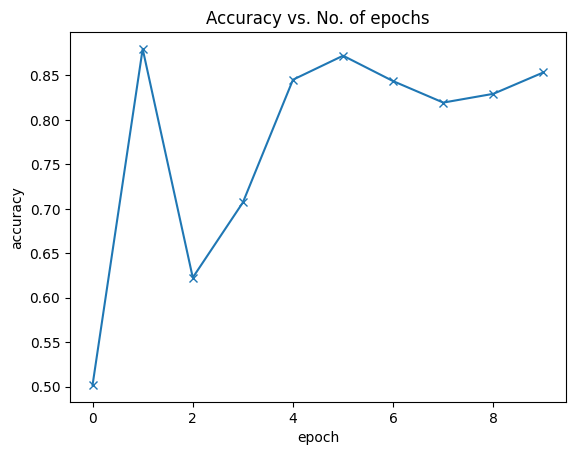

In [ ]:

metrics = train_epocs(model, epochs=10, lr=0.005)
print('validation set:', evaluate(model, x_val, y_val))
plot_accuracies(metrics)

Epoch [0], train_loss: 0.3145, train_acc: 0.8805
Epoch [1], train_loss: 0.3053, train_acc: 0.8871
Epoch [2], train_loss: 0.3047, train_acc: 0.8840
Epoch [3], train_loss: 0.2998, train_acc: 0.8840
Epoch [4], train_loss: 0.2884, train_acc: 0.8878
Epoch [5], train_loss: 0.2743, train_acc: 0.8950
Epoch [6], train_loss: 0.2626, train_acc: 0.8989
Epoch [7], train_loss: 0.2558, train_acc: 0.8994
Epoch [8], train_loss: 0.2527, train_acc: 0.9015
Epoch [9], train_loss: 0.2492, train_acc: 0.9011
validation set: {'loss': 0.2908220887184143, 'accuracy': 0.8790000081062317}


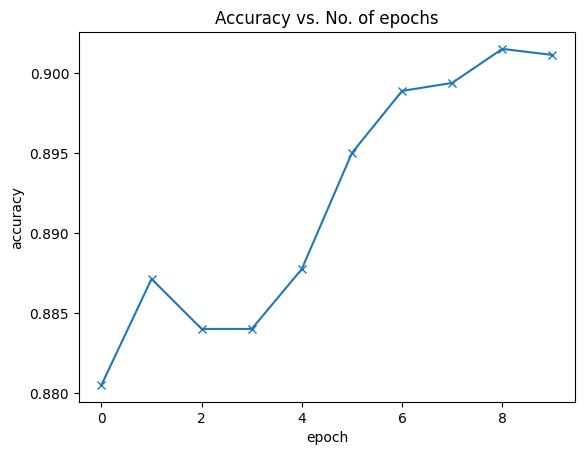

In [ ]:
metrics = train_epocs(model, epochs=10, lr=0.001)   # <<< store new history
print('validation set:', evaluate(model, x_val, y_val))
plot_accuracies(metrics)

Epoch [0], train_loss: 0.2475, train_acc: 0.9041
Epoch [1], train_loss: 0.2410, train_acc: 0.9061
Epoch [2], train_loss: 0.2310, train_acc: 0.9090
Epoch [3], train_loss: 0.2279, train_acc: 0.9130
Epoch [4], train_loss: 0.2253, train_acc: 0.9131
Epoch [5], train_loss: 0.2187, train_acc: 0.9166
Epoch [6], train_loss: 0.2121, train_acc: 0.9197
Epoch [7], train_loss: 0.2087, train_acc: 0.9196
Epoch [8], train_loss: 0.2060, train_acc: 0.9211
Epoch [9], train_loss: 0.2013, train_acc: 0.9225
Epoch [10], train_loss: 0.1954, train_acc: 0.9258
Epoch [11], train_loss: 0.1911, train_acc: 0.9289
Epoch [12], train_loss: 0.1882, train_acc: 0.9295
Epoch [13], train_loss: 0.1846, train_acc: 0.9310
Epoch [14], train_loss: 0.1799, train_acc: 0.9334
Epoch [15], train_loss: 0.1756, train_acc: 0.9350
Epoch [16], train_loss: 0.1726, train_acc: 0.9349
Epoch [17], train_loss: 0.1695, train_acc: 0.9370
Epoch [18], train_loss: 0.1654, train_acc: 0.9392
Epoch [19], train_loss: 0.1612, train_acc: 0.9416
Epoch [20]

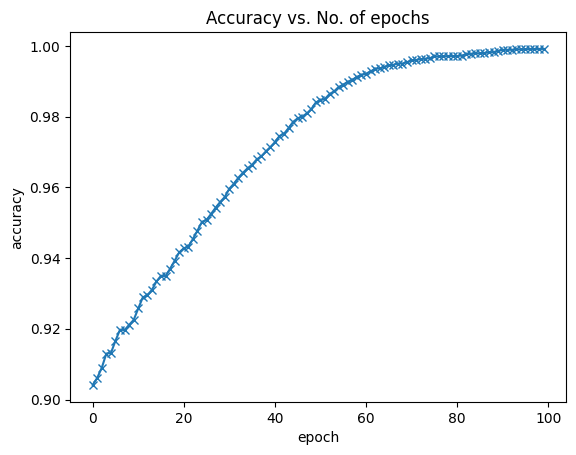

In [ ]:

metrics = train_epocs(model, epochs=100, lr=0.001)  # <<< store new history
print('validation set:', evaluate(model, x_val, y_val))
plot_accuracies(metrics)


In [ ]:
import torch.nn.functional as F

In [ ]:

print('test set:', evaluate(model, x_test, y_test))

test set: {'loss': 0.27883923053741455, 'accuracy': 0.9010000228881836}


In [ ]:
# ==============================================================
# 4. COMPUTE DAILY SubjObj_Score FOR ALL DATES IN df (DJIA dataset)
# ==============================================================

def compute_subjobj_score(df_in, model, vocab2index, max_len=40):
    df_local = df_in.copy()
    # Combine Top1..Top25 (raw headlines) for the CNN subjectivity model
    df_local["combined_news_cnn"] = df_local.loc[:, "Top1":"Top25"].astype(str).agg(" ".join, axis=1)

    def encode_sentence_local(s):
        enc = np.zeros(max_len, dtype=np.int32)
        words = str(s).lower().split()
        enc1 = np.array([vocab2index.get(w, vocab2index["UNK"]) for w in words])
        l = min(max_len, len(enc1))
        enc[:l] = enc1[:l]
        return enc

    encoded = np.vstack([encode_sentence_local(text) for text in df_local["combined_news_cnn"]])
    x_tensor = torch.LongTensor(encoded)

    model.eval()
    with torch.no_grad():
        logits = model(x_tensor)
        probs = torch.sigmoid(logits).squeeze().numpy()  # prob of OBJECTIVE (class 1)

    df_local["Prob_Objective"] = probs
    daily_scores = df_local.groupby("Date")["Prob_Objective"].mean().reset_index()
    daily_scores.rename(columns={"Prob_Objective": "SubjObj_Score"}, inplace=True)
    return daily_scores


In [ ]:


# Compute subjectivity for ALL dates in df
subjobj_scores = compute_subjobj_score(df, model, vocab2index)

# Merge back – inner join keeps only dates with both news+stock+subjectivity
df = pd.merge(df, subjobj_scores, on="Date", how="inner")
df["Subjectivity_Score"] = 1 - df["SubjObj_Score"]

print("After adding Subjectivity_Score:", df.shape)
print(df[["Date", "SubjObj_Score", "Subjectivity_Score"]].head())

# (Optional) save intermediate
df.to_csv("df_subjobj_full.csv", index=False)
print("Saved df_subjobj_full.csv")

After adding Subjectivity_Score: (1989, 41)
        Date  SubjObj_Score  Subjectivity_Score
0 2008-08-08       0.670240            0.329760
1 2008-08-11       0.549991            0.450009
2 2008-08-12       0.451978            0.548022
3 2008-08-13       0.990656            0.009344
4 2008-08-14       0.283535            0.716465
Saved df_subjobj_full.csv


In [ ]:


# Import the Colab files module
from google.colab import files

# Download the file
files.download('df_subjobj_full.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving df_subjobj_full.csv to df_subjobj_full.csv


In [ ]:
df=pd.read_csv("df_subjobj_full.csv")

In [ ]:
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Volume,Adj Close,combined_news,clean_text,compound,neg,pos,neu,SubjObj_Score,Subjectivity_Score
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,212830000,11734.320312,"b""Georgia 'downs two Russian warplanes' as cou...",georgia down two russian warplane country move...,-0.9971,0.292,0.068,0.639,0.670240,0.329760
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,183190000,11782.349609,b'Why wont America and Nato help us? If they w...,wont america nato help u wont help u help iraq...,-0.9895,0.293,0.107,0.600,0.549991,0.450008
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,173590000,11642.469727,b'Remember that adorable 9-year-old who sang a...,remember adorable year old sang opening ceremo...,-0.9942,0.266,0.094,0.641,0.451978,0.548022
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,182550000,11532.959961,b' U.S. refuses Israel weapons to attack Iran:...,u refuse israel weapon attack iran report pres...,-0.9712,0.206,0.108,0.687,0.990656,0.009344
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",...,159790000,11615.929688,b'All the experts admit that we should legalis...,expert admit legalise drug war south osetia pi...,-0.9855,0.252,0.132,0.615,0.283535,0.716464


#Classification


In [ ]:

need_cols = ['Open', 'High', 'Low','Close', 'Volume', 'Adj Close', 'compound','neg', 'pos', 'neu','Subjectivity_Score']

for c in need_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")

df = df.dropna(subset=["Date", "Adj Close"]).reset_index(drop=True)

In [ ]:


# Technical indicators
def rsi(series, n=14):
    d = series.diff()
    up = d.clip(lower=0).rolling(n).mean()
    dn = (-d.clip(upper=0)).rolling(n).mean()
    rs = up / (dn + 1e-12)
    return 100 - 100/(1+rs)

def macd(series, fast=12, slow=26, signal=9):
    ema_f = series.ewm(span=fast, adjust=False).mean()
    ema_s = series.ewm(span=slow, adjust=False).mean()
    line = ema_f - ema_s
    sig  = line.ewm(span=signal, adjust=False).mean()
    return line, sig, line - sig


In [ ]:
px = pd.to_numeric(df["Adj Close"], errors="coerce")
rsi14 = rsi(px, 14)
macd_line, macd_sig, macd_hist = macd(px)

df["rsi14"] = rsi14
df["macd_line"] = macd_line
df["macd_signal"] = macd_sig
df["macd_hist"] = macd_hist


In [ ]:

df["Date"]  = pd.to_datetime(df["Date"], errors="coerce")   # Convert the Date column in the sentiment data to proper datetime format
df= df.sort_values("Date").reset_index(drop=True)

In [ ]:

# Day-of-week dummies
df["dow"] = df["Date"].dt.dayofweek.astype(float)
dow_dummies = pd.get_dummies(df["dow"], prefix="dow").astype(int)

# ensure dow_0.0 ... dow_4.0 exist
for i in range(5):
    col = f"dow_{i}.0"
    if col not in dow_dummies.columns:
        dow_dummies[col] = 0

dow_dummies = dow_dummies[[f"dow_{i}.0" for i in range(5)]]

df = pd.concat([df, dow_dummies], axis=1)
df = df.drop(columns=["dow"])

In [ ]:
df.columns

Index(['Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15',
       'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23',
       'Top24', 'Top25', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close',
       'combined_news', 'clean_text', 'compound', 'neg', 'pos', 'neu',
       'SubjObj_Score', 'Subjectivity_Score', 'rsi14', 'macd_line',
       'macd_signal', 'macd_hist', 'dow_0.0', 'dow_1.0', 'dow_2.0', 'dow_3.0',
       'dow_4.0'],
      dtype='object')

In [ ]:

# -------------------
# FEATURES
# -------------------
features = ['Open', 'High', 'Low','Volume', 'compound','Subjectivity_Score',
            'neg', 'pos', 'neu', 'rsi14', 'macd_line', 'macd_signal', 'macd_hist',
            'dow_0.0', 'dow_1.0', 'dow_2.0', 'dow_3.0','dow_4.0']

# Drop rows with NaNs in features or label (prevents sklearn error)
df = df.dropna(subset=features + ['Label']).reset_index(drop=True)

X = df[features]
y = df['Label'].astype(int)


In [ ]:

# Split by date
split_date = "2015-01-01"
X_train = X[df["Date"] < split_date]
y_train = y[df["Date"] < split_date]

X_test = X[df["Date"] >= split_date]
y_test = y[df["Date"] >= split_date]

In [ ]:
# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [ ]:
# hyperparameter tuning
model_params = {
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000),
        "params": {"C": [0.01, 0.1, 1, 10, 100], "solver": ["liblinear", "lbfgs"]}
    },
    "Naive Bayes": {
        "model": GaussianNB(),
        "params": {}
    },
    "SVM": {
        "model": svm.SVC(),
        "params": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"], "gamma": ["scale", "auto"]}
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {"n_neighbors": [3,5,7,11,15], "weights": ["uniform", "distance"]}
    },
    "XGBoost": {
        "model": XGBClassifier(eval_metric='logloss'),
        "params": {"n_estimators": [100, 200], "max_depth": [3, 5, 7], "learning_rate": [0.01, 0.1]}
    },
    "Random Forest": {
        "model": RandomForestClassifier(),
        "params": {"n_estimators": [100, 200], "max_depth": [None, 5, 10], "max_features": ["sqrt", "log2", None]}
    },
    "LDA": {
        "model": LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto'),
        "params": {}
    }
}

In [ ]:


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = []

for name, mp in model_params.items():
    model = mp["model"]
    params = mp["params"]

    if params:
        grid = GridSearchCV(model, params, cv=cv, scoring="accuracy", n_jobs=-1)
        grid.fit(X_train_scaled, y_train)
        best_model = grid.best_estimator_
        best_params = grid.best_params_
    else:
        best_model = model
        best_model.fit(X_train_scaled, y_train)
        best_params = "None"

    y_pred_train = best_model.predict(X_train_scaled)
    y_pred_test = best_model.predict(X_test_scaled)

    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test  = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test, average="weighted", zero_division=0)
    recall = recall_score(y_test, y_pred_test, average="weighted", zero_division=0)
    f1 = f1_score(y_test, y_pred_test, average="weighted", zero_division=0)

    results.append({
        "Model": name,
        "Best Params": best_params,
        "Train Accuracy": round(acc_train, 4),
        "Test Accuracy": round(acc_test, 4),
        "Precision": round(precision, 4),
        "Recall": round(recall, 4),
        "F1 Score": round(f1, 4)
    })

results_df = pd.DataFrame(results).sort_values(by="Test Accuracy", ascending=False)
print(results_df)

                 Model                                        Best Params  \
0  Logistic Regression                      {'C': 100, 'solver': 'lbfgs'}   
2                  SVM    {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}   
6                  LDA                                               None   
4              XGBoost  {'learning_rate': 0.01, 'max_depth': 3, 'n_est...   
5        Random Forest  {'max_depth': 5, 'max_features': 'sqrt', 'n_es...   
1          Naive Bayes                                               None   
3                  KNN          {'n_neighbors': 15, 'weights': 'uniform'}   

   Train Accuracy  Test Accuracy  Precision  Recall  F1 Score  
0          0.8635         0.8836     0.8838  0.8836    0.8836  
2          0.8528         0.8571     0.8576  0.8571    0.8571  
6          0.6293         0.6190     0.6191  0.6190    0.6186  
4          0.6468         0.5741     0.5926  0.5741    0.5459  
5          0.6969         0.5688     0.5744  0.5688    0.5560  

#Regression

In [ ]:
df.columns

Index(['Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15',
       'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23',
       'Top24', 'Top25', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close',
       'combined_news', 'clean_text', 'compound', 'neg', 'pos', 'neu',
       'SubjObj_Score', 'Subjectivity_Score'],
      dtype='object')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - loss: 0.0347 - val_loss: 0.0039
Epoch 2/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - loss: 0.0026 - val_loss: 9.9479e-04
Epoch 3/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - loss: 0.0025 - val_loss: 0.0021
Epoch 4/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.0022 - val_loss: 9.7954e-04
Epoch 5/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - loss: 0.0020 - val_loss: 0.0015
Epoch 6/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - loss: 0.0019 - val_loss: 0.0056
Epoch 7/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 0.0026 - val_loss: 5.8835e-04
Epoch 8/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - loss: 0.0017 - val_loss: 7.6038e-04
Epoch 9/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - loss: 0.0017 - val_loss: 0.0010
Epoch 10/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - loss: 0.0019 - val_loss: 0.0016
Epoch 11/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - loss: 0.0019 - val_loss: 6.9001e-04
Epoch 12/200
44/44 ━━━━━━━━━━━

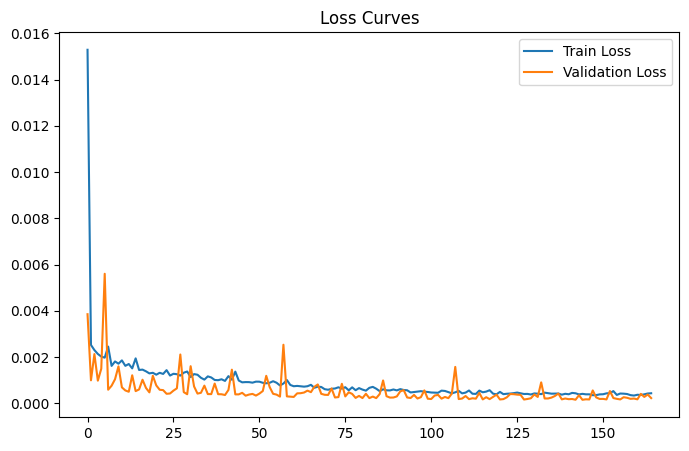

49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
✅ Train R²: 0.9977168945887029
✅ Test  R²: 0.8744454737323869


In [ ]:
#Regression

# ==========================
# Fix randomness - MUST BE AT THE VERY TOP
# ==========================
import os
os.environ['PYTHONHASHSEED'] = '42'
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Set all random seeds
random.seed(42)
tf.random.set_seed(42)
np.random.seed(42)

df=pd.read_csv("df_subjobj_full.csv")
df_merged=df.copy()

# Convert the 'Date' column to datetime format, coercing invalid values to NaT

# Ensure numeric & datetime
df_merged["Date"] = pd.to_datetime(df_merged["Date"], errors="coerce")
for c in ['compound', 'neg', 'pos', 'neu', 'Subjectivity_Score', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']:
    df_merged[c] = pd.to_numeric(df_merged[c], errors="coerce")

# ==========================
# Technical indicators
# ==========================
px = df_merged["Adj Close"]

# Returns
df_merged["ret1"] = px.pct_change(1)
df_merged["ret5"] = px.pct_change(5)
df_merged["ret10"] = px.pct_change(10)

# Volatility
df_merged["vol10"] = df_merged["ret1"].rolling(10).std()
df_merged["vol20"] = df_merged["ret1"].rolling(20).std()

# RSI
def rsi(series, n=14):
    d = series.diff()
    up = d.clip(lower=0).rolling(n).mean()
    dn = (-d.clip(upper=0)).rolling(n).mean()
    rs = up / dn.replace(0, 1e-12)
    return 100 - (100 / (1 + rs))
df_merged["RSI14"] = rsi(px, 14)

# MACD
ema12 = px.ewm(span=12, adjust=False).mean()
ema26 = px.ewm(span=26, adjust=False).mean()
df_merged["MACD"] = ema12 - ema26
df_merged["MACDsig"] = df_merged["MACD"].ewm(span=9, adjust=False).mean()
df_merged["MACDhist"] = df_merged["MACD"] - df_merged["MACDsig"]

# Day-of-week dummies
df_merged["dow"] = df_merged["Date"].dt.dayofweek.astype(int)
dow_dummies = pd.get_dummies(df_merged["dow"], prefix="dow").astype(int)
for i in range(5):
    col = f"dow_{i}"
    if col not in dow_dummies.columns:
        dow_dummies[col] = 0
dow_dummies = dow_dummies[[f"dow_{i}" for i in range(5)]]
df_merged = pd.concat([df_merged, dow_dummies], axis=1)
df_merged = df_merged.drop(columns=["dow"])

# ==========================
# Features & target
# ==========================
base_features = ['compound', 'neg', 'pos', 'neu', 'Subjectivity_Score', 'Open', 'High', 'Low', 'Close', 'Volume']
tech_features = ["ret1","ret5","ret10","vol10","vol20","RSI14","MACD","MACDsig","MACDhist",
                 "dow_0","dow_1","dow_2","dow_3","dow_4"]
features = base_features + tech_features

# Next-day target
#df_merged["AdjClose_next"] = df_merged["Adj Close"].shift(-1)
#target = "AdjClose_next"
target="Adj Close"
# Drop rows with NaNs
df_merged = df_merged.dropna(subset=features + [target]).reset_index(drop=True)

# ==========================
# Train/test split
# ==========================
train = df_merged[df_merged['Date'] < '2015-01-01']
test = df_merged[df_merged['Date'] >= '2015-01-01']

X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

X_train = X_scaler.fit_transform(train[features])
y_train = y_scaler.fit_transform(train[[target]])

X_test = X_scaler.transform(test[features])
y_test = y_scaler.transform(test[[target]])

SEQ_LEN = 30

def create_sequences(X, y, seq_len=SEQ_LEN):
    Xs, ys = [], []
    for i in range(len(X) - seq_len):
        Xs.append(X[i:i+seq_len])
        ys.append(y[i+seq_len])
    return np.array(Xs), np.array(ys)

X_train_seq, y_train_seq = create_sequences(X_train, y_train)
X_test_seq, y_test_seq = create_sequences(X_test, y_test)

# ==========================
# LSTM model
# ==========================
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(SEQ_LEN, X_train_seq.shape[2])),
    Dropout(0.1),
    LSTM(64, return_sequences=True),
    Dropout(0.1),
    LSTM(32),
    Dropout(0.1),
    Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='mse')

history = model.fit(
    X_train_seq, y_train_seq,
    epochs=200,
    batch_size=32,
    validation_split=0.1,
    callbacks=[EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)],
    verbose=1
)

# ==========================
# Prediction
# ==========================
y_pred_scaled = model.predict(X_test_seq)
y_pred_inv = y_scaler.inverse_transform(y_pred_scaled)
y_test_inv = y_scaler.inverse_transform(y_test_seq)

# ==========================
# Metrics
# ==========================
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
r2 = r2_score(y_test_inv, y_pred_inv)
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv) * 100

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"MAPE: {mape:.2f}%")

# ==========================
# Loss curves
# ==========================
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Curves')
plt.show()

# ==========================
# Train & Test R²
# ==========================
train_preds_scaled = model.predict(X_train_seq)
train_pred_inv = y_scaler.inverse_transform(train_preds_scaled)
train_true_inv = y_scaler.inverse_transform(y_train_seq)

test_pred_scaled = model.predict(X_test_seq)
test_pred_inv = y_scaler.inverse_transform(test_pred_scaled)
test_true_inv = y_scaler.inverse_transform(y_test_seq)

print("✅ Train R²:", r2_score(train_true_inv, train_pred_inv))
print("✅ Test  R²:", r2_score(test_true_inv, test_pred_inv))